In [3]:
from kan import *
torch.set_default_dtype(torch.float64)
from kan.utils import create_dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [2]:
model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)


checkpoint directory created: ./model
saving model version 0.0


In [4]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

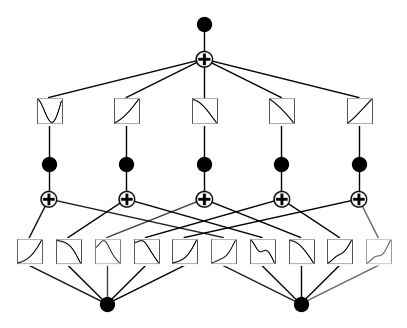

In [5]:
model(dataset['train_input']);
model.plot()

In [6]:
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 2.01e-02 | test_loss: 1.99e-02 | reg: 5.71e+00 | : 100%|█| 50/50 [00:12<00:00,  3.88it

saving model version 0.1


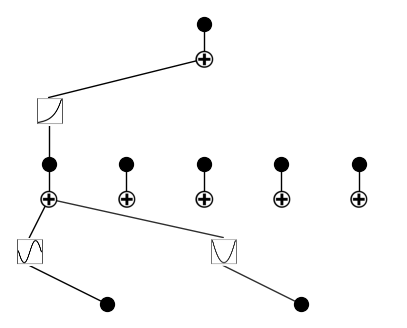

In [7]:
model.plot()

saving model version 0.2


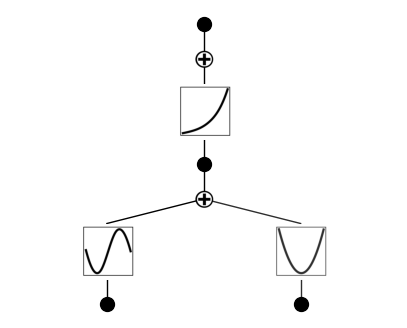

In [8]:
model = model.prune()
model.plot()

In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.77e-02 | test_loss: 1.70e-02 | reg: 8.21e+00 | : 100%|█| 50/50 [00:12<00:00,  3.91it

saving model version 0.3
